# Daily average Air Quality Index (AQI) by every US County 

- data available at : https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import datetime


## Part 1. Code to load in the dataset

In [3]:
#read in csv file
aqi=pd.read_csv('daily_aqi_by_county_2020.csv')
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2020-01-01,48,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2020-01-04,13,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2020-01-07,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2020-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2020-01-13,29,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
336696,Wyoming,Weston,56,45,2020-12-27,32,Good,Ozone,56-045-0003,2
336697,Wyoming,Weston,56,45,2020-12-28,30,Good,Ozone,56-045-0003,2
336698,Wyoming,Weston,56,45,2020-12-29,33,Good,Ozone,56-045-0003,2
336699,Wyoming,Weston,56,45,2020-12-30,33,Good,Ozone,56-045-0003,2


### Part 1.1 How are input data files Organized?

 - Input data files organized as daily AQI averages by US Counties
 - All variables included in a single file

### Part 1.2 What kind of metadata are provided?

 - Types of metadata provided
     1) The aggregate of all sub-daily measurements taken at the monitor.
     2) The single sample value if the monitor takes a single, daily sample (e.g., there is only one sample with a 24-hour duration). In this case, the mean and max daily sample will have the same value.
    3) https://aqs.epa.gov/aqsweb/airdata/FileFormats.html#_format_4

### Part 1.3 What format are the date and geospatial data provided in?

 - Date format downloaded as 'object' type.  No geospatial coordinates downloaded; however, county centroid data could be merged with data for geospatial relation.

In [35]:
## data types
aqi_dtypes=aqi.dtypes
print(aqi_dtypes)

State Name                           object
county Name                          object
State Code                            int64
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
dtype: object


In [7]:
# explore head of data
aqi.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2020-01-01,48,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2020-01-04,13,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2020-01-07,14,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2020-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2020-01-13,29,Good,PM2.5,01-003-0010,1


## Part 2. Investigate Data Quality

In [16]:
# summary statistics on AQI
aqi['AQI'].describe()


count    336701.000000
mean         36.867431
std          24.172169
min           0.000000
25%          26.000000
50%          35.000000
75%          44.000000
max        1928.000000
Name: AQI, dtype: float64

### Part 2.1 Data Artificats
 - Total observations include 336,701
 - AQI in the dataset ranges from 0 to 1,928.
 - Defining AQI source provided as PM2.5', 'Ozone', 'NO2', 'PM10', 'SO2', 'CO'
 - **Extreme Values** overview
     - US EPA AQI scale ranges from 0 to 500; however, some values are greater than 500 which indicates extremely hazardous conditions.
     - In exploring the AQI observations greater than 500, we noticed all the observations defining parameter was PM2.5 or PM10.
     - Looking at the dates and locations, this is likely due to wildfires as opposed inaccurate data.


In [80]:
# count number of AQI values greater than 500
# total of 46 observations with AQI greater than 500

aqi_high=aqi[aqi['AQI']>500]

print(aqi_high.describe())

       State Code  County Code          AQI  Number of Sites Reporting
count   46.000000    46.000000    46.000000                  46.000000
mean    28.369565    40.826087   757.913043                   3.956522
std     20.532206    15.375745   350.080678                   4.366318
min      4.000000     5.000000   502.000000                   1.000000
25%      6.000000    31.000000   537.000000                   2.000000
50%     41.000000    43.000000   605.000000                   2.000000
75%     41.000000    51.000000   810.750000                   3.000000
max     56.000000    71.000000  1928.000000                  18.000000


In [33]:
aqi['Defining Parameter'].unique()

# aqi_high['Defining Parameter'].unique()

array(['PM2.5', 'Ozone', 'NO2', 'PM10', 'SO2', 'CO'], dtype=object)

### Part 2.2 Data Coverage and completeness
 - In exploring the data, not all counties included for every state.
 - Data coverage is meant to be daily averages; however, there is missing data for some days in some counties
 - Breaks in data are not consistent
 - Not all counties in every state are representated
     - Includes observations for all 50 states 
     - Also includes District of Columbia, Mexico, Virgin Islands, and Puerto Rico


In [36]:
# format date as datetime
aqi['Date']=pd.to_datetime(aqi['Date'], format = '%Y-%m-%d')

aqi_dtypes=aqi.dtypes
print(aqi_dtypes)

State Name                           object
county Name                          object
State Code                            int64
County Code                           int64
Date                         datetime64[ns]
AQI                                   int64
Category                             object
Defining Parameter                   object
Defining Site                        object
Number of Sites Reporting             int64
dtype: object


In [87]:
# view state names
aqi['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [89]:
# subset dataset to Alameda County, CA only
aqi_ca=aqi[aqi["State Name"]=="California"]

# check out counties of CA
a = aqi_ca['county Name'].unique()

# subset to Alameda counties
aqi_ca_alameda=aqi_ca[aqi_ca['county Name']=='Alameda']


### Part 2.3 Any systematic biases or limitations associated with instruments used to generate the data?
 - Defining parameters for the AQI values are different across readings.  For example a defining AQI value could be a result of ozone one day while another day the defining paramater could be PM10.

### Part 3 Possible Use Cases
- Identification of extreme weather events (wildfires) 
- Identification of trends in air quality for certain locations
- User groups who might benefit most from the application of this information:
    - Health organizations
    - Schools/universities
- Data might be most relevant in fire prone areas or in areas with other large sources of air pollutants (eg. large cities).


### Part 4 Exploratory Plots

(0.0, 500.0)

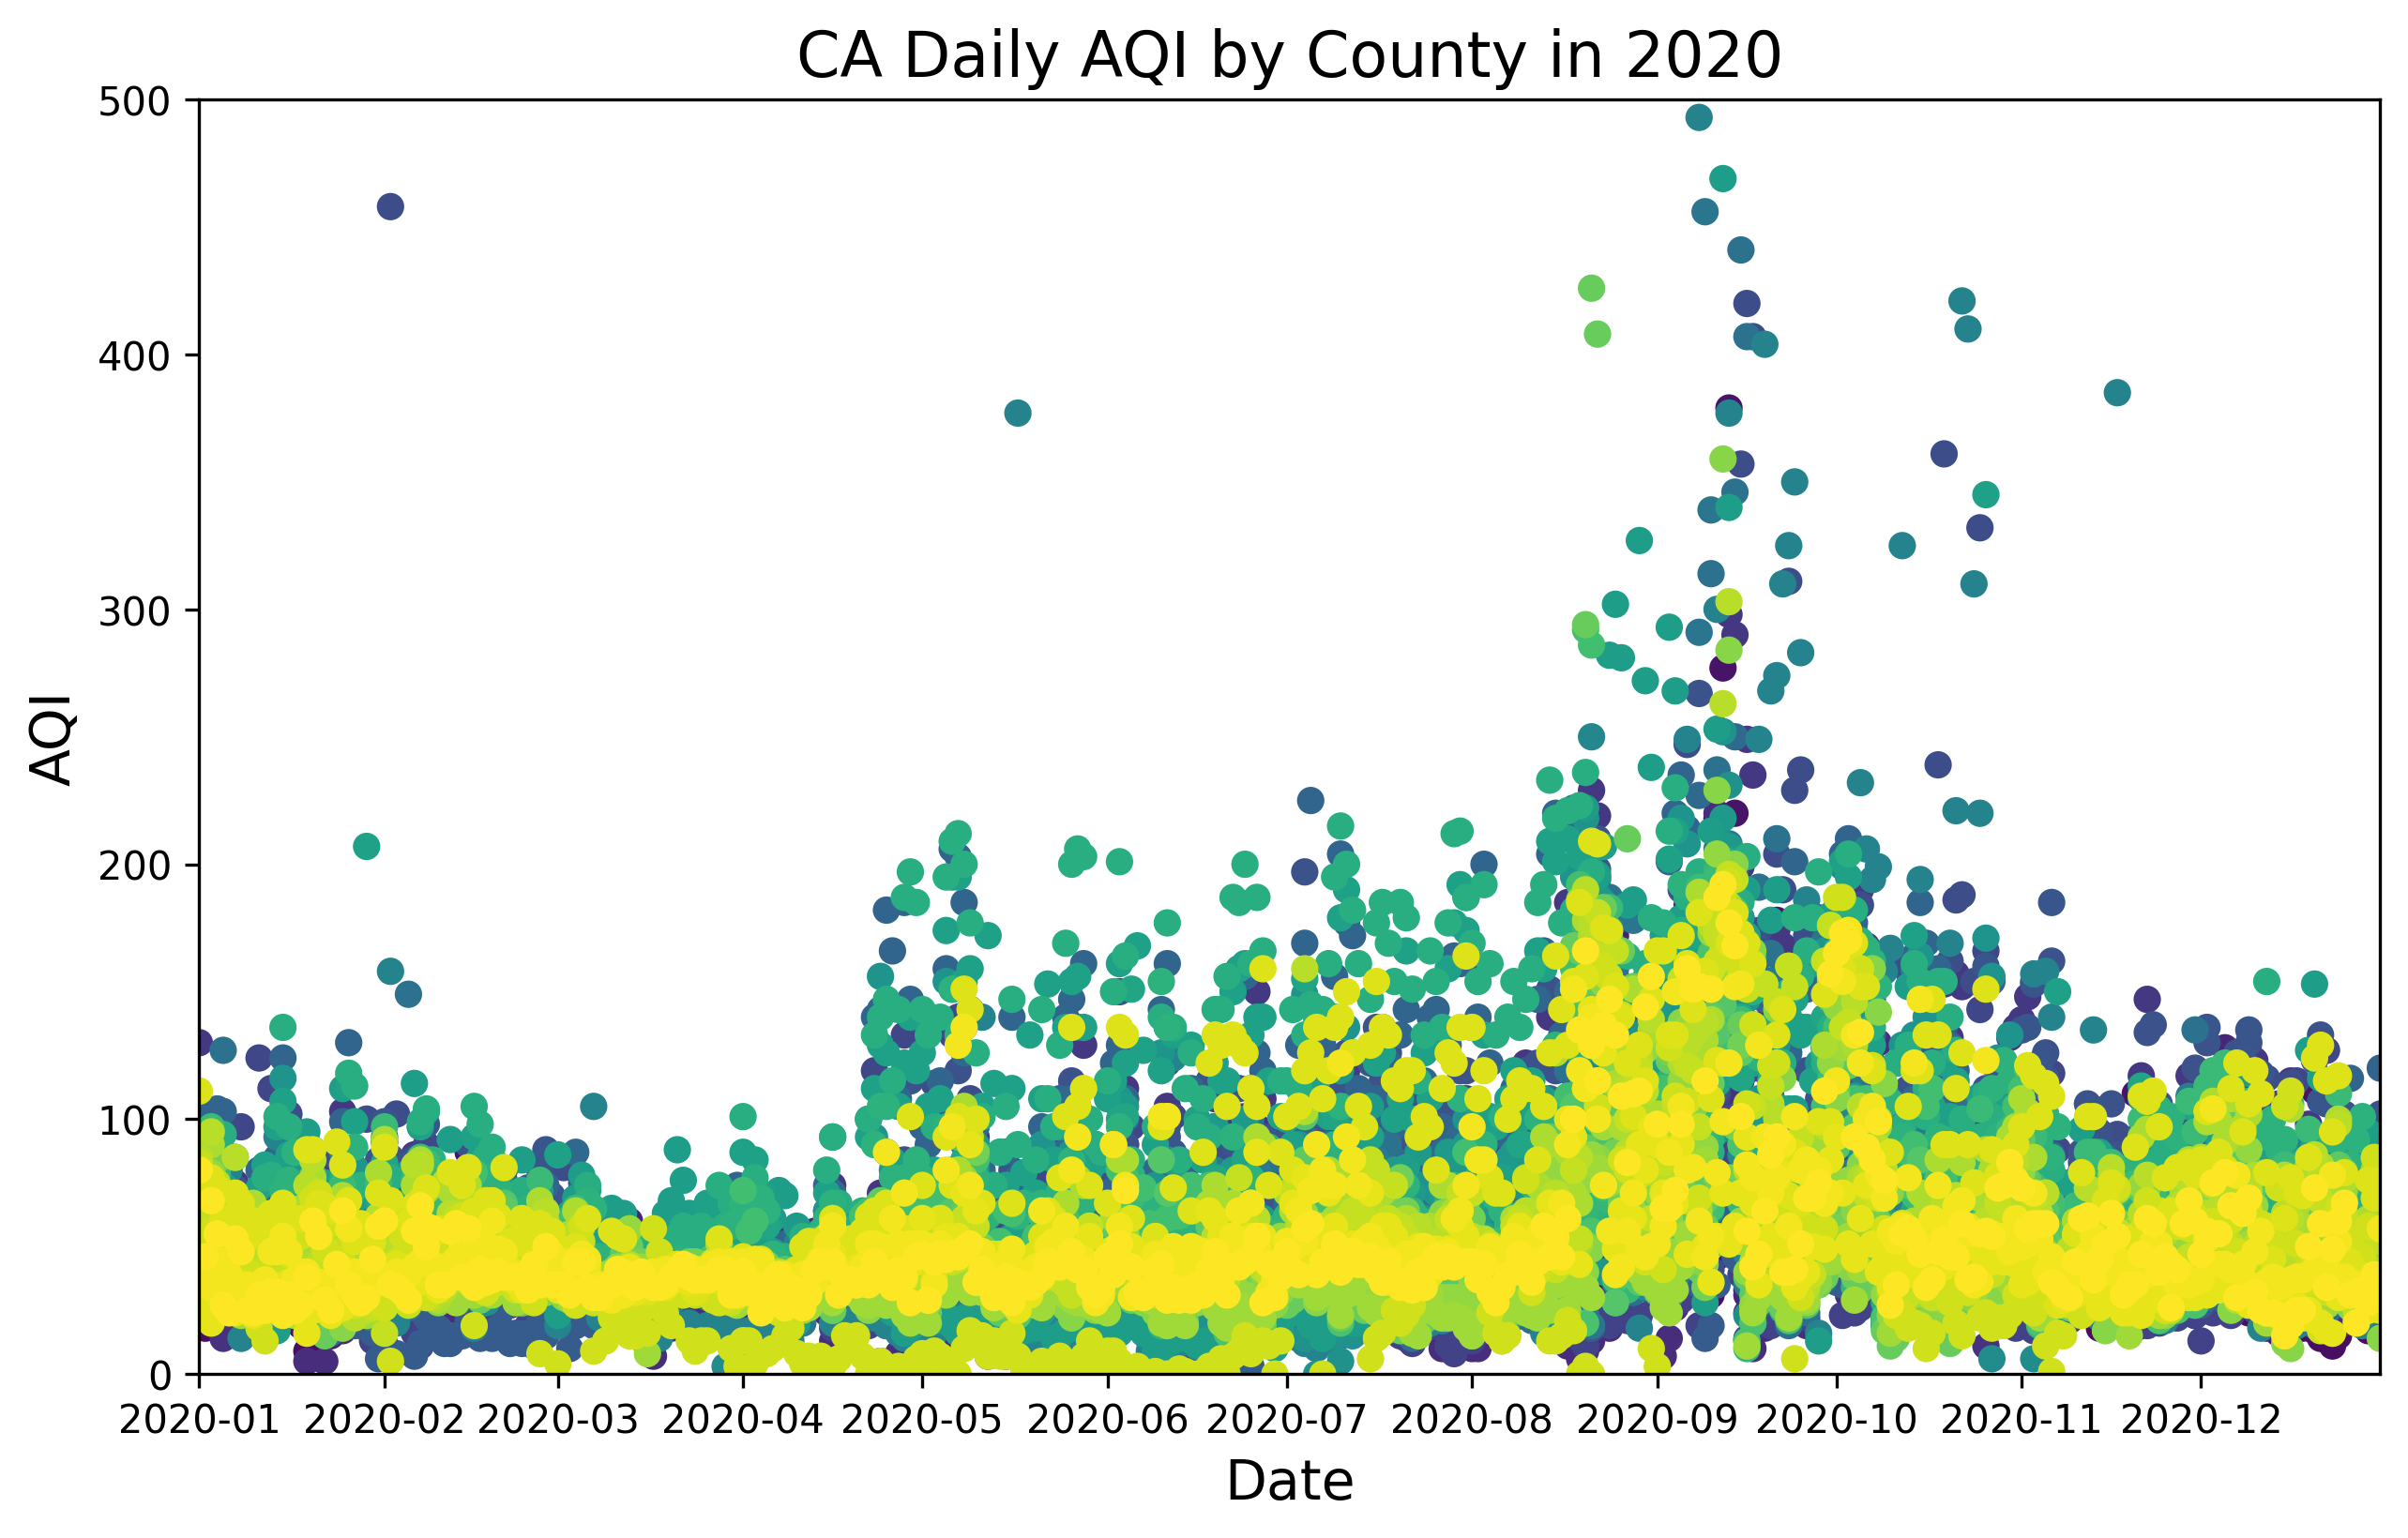

In [105]:
# practice plot

plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.scatter(aqi_ca['Date'], aqi_ca['AQI'], c=aqi_ca['County Code'])  # add data to the plot

#plt.legend(scatterpoints=1, handles='County Code', frameon=False, labelspacing=1, title='County Code')

plt.title('CA Daily AQI by County in 2020', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xlim([np.datetime64('2020-01-01'), np.datetime64('2020-12-31')])
plt.ylim(0,500)


(0.0, 250.0)

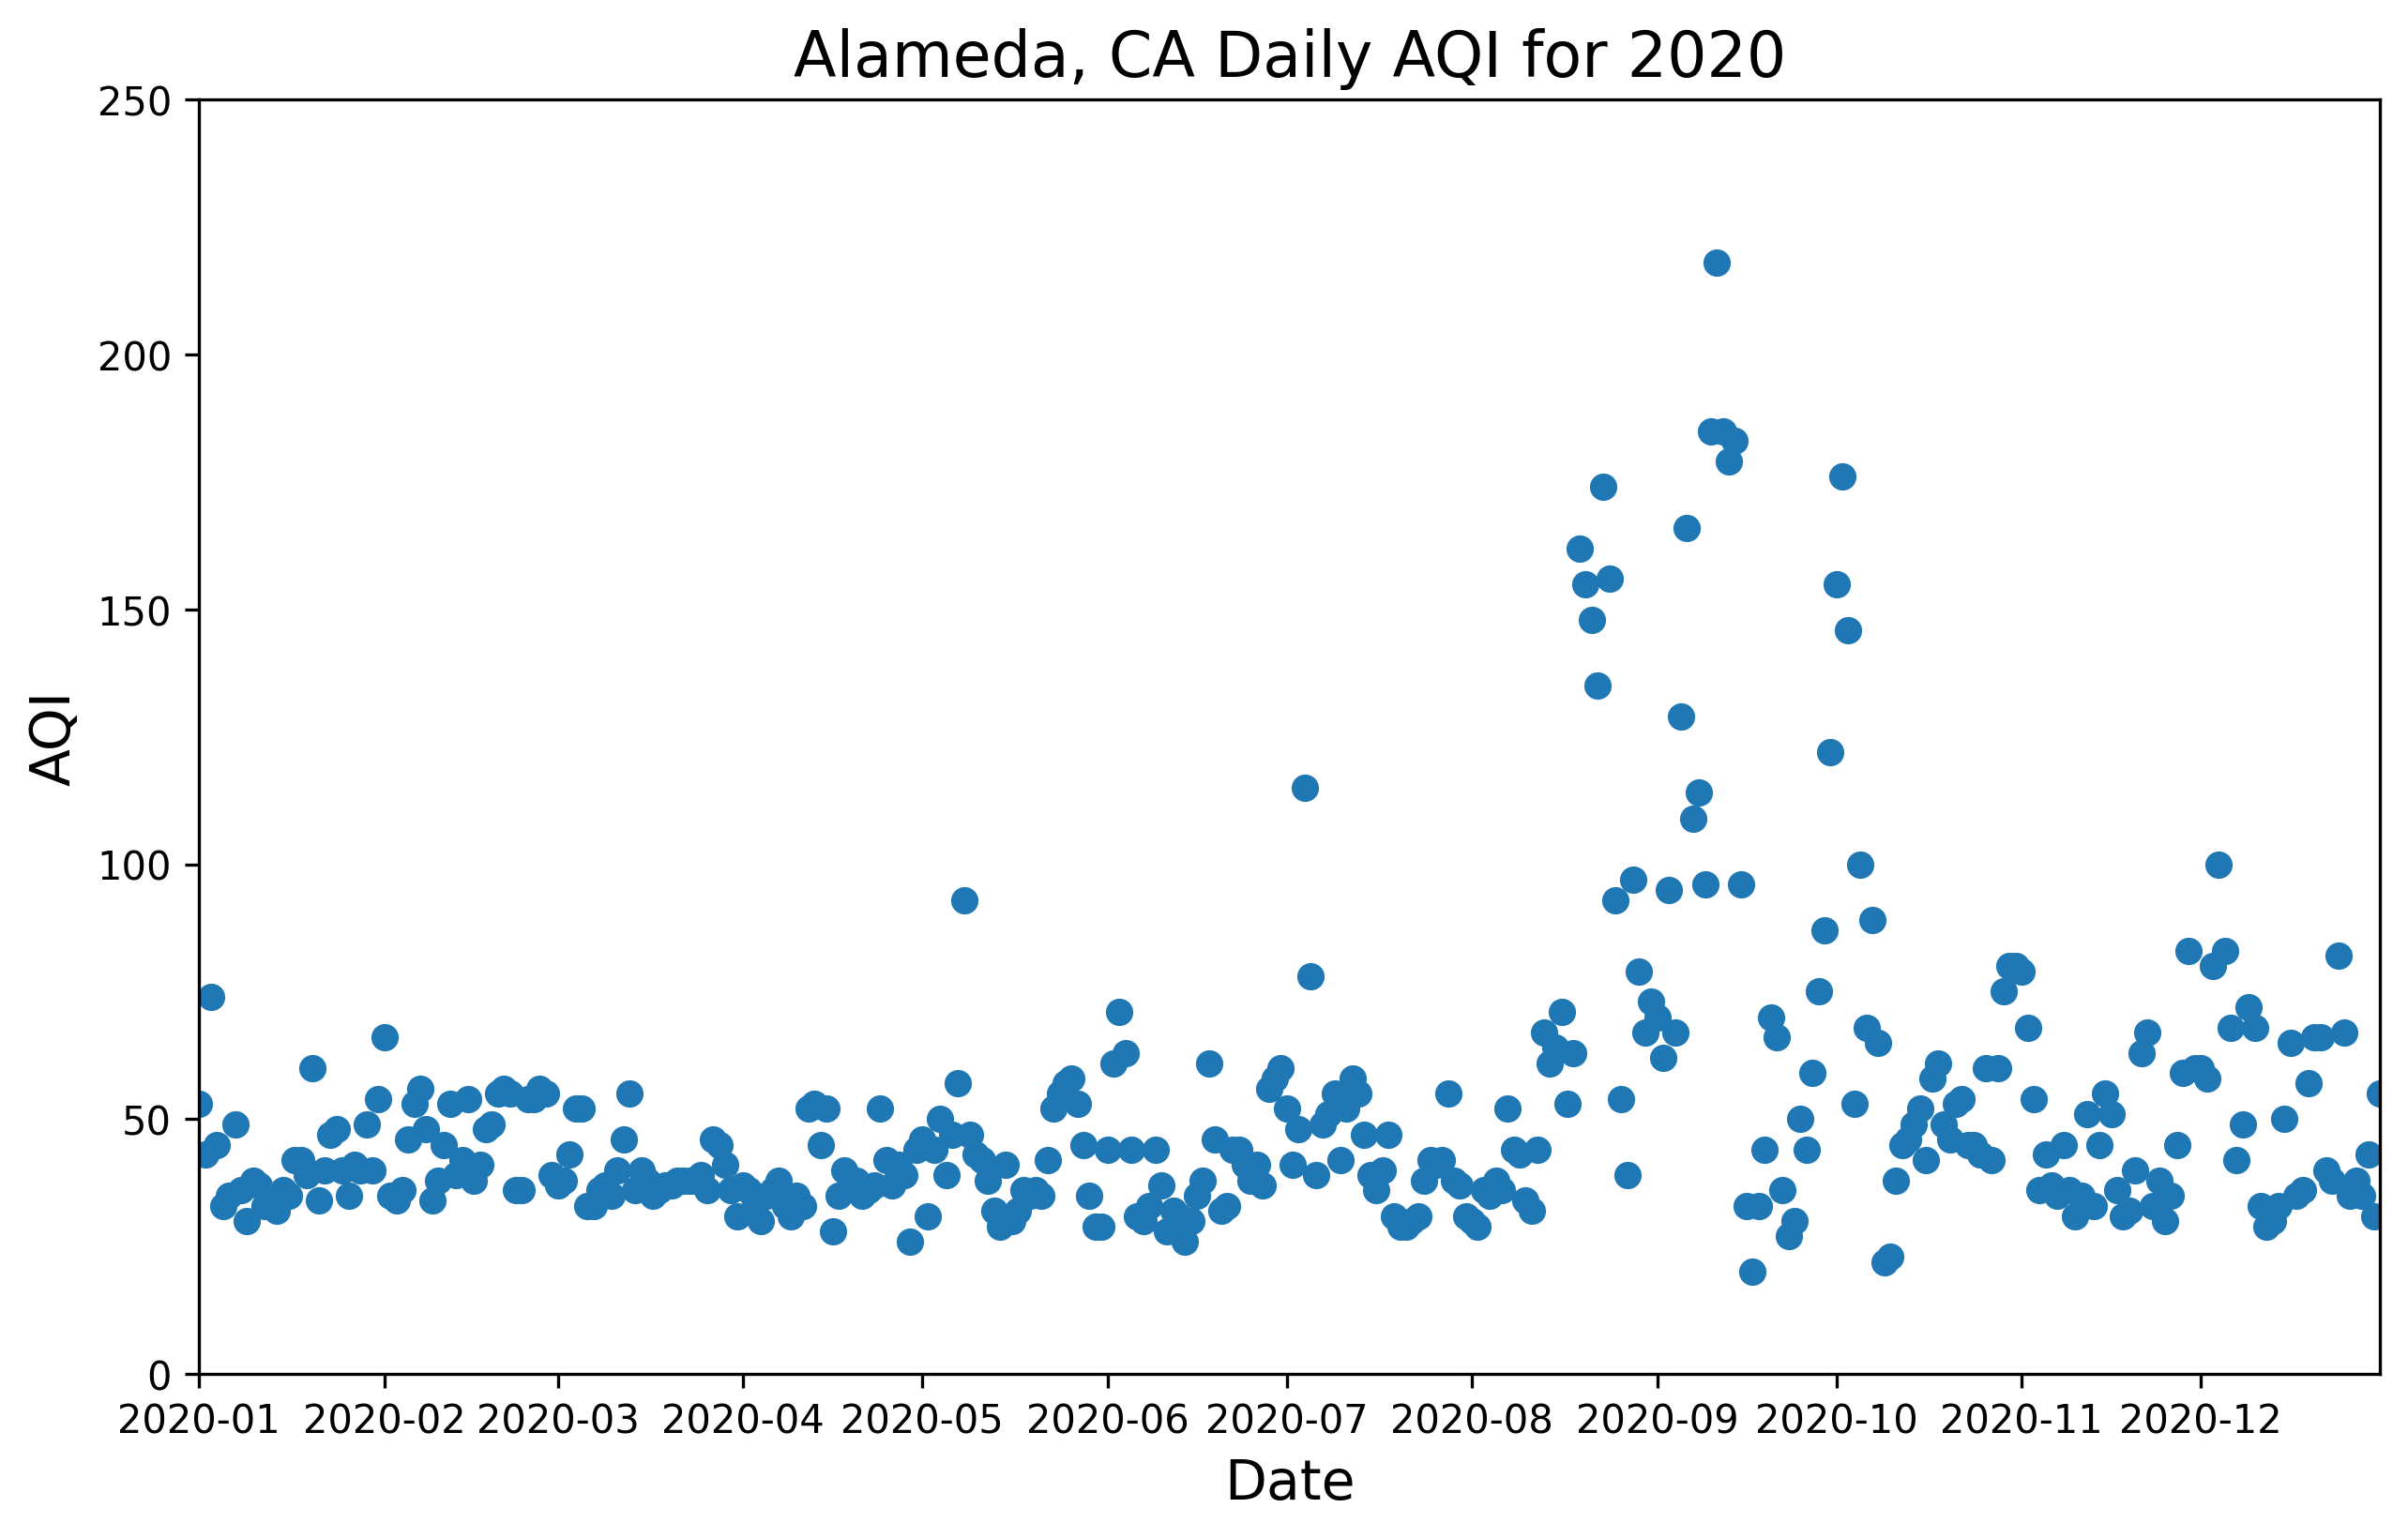

In [104]:
plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.scatter(aqi_ca_alameda['Date'], aqi_ca_alameda['AQI'])  # add data to the plot

#plt.legend(scatterpoints=1, handles='County Code', frameon=False, labelspacing=1, title='County Code')

plt.title('Alameda, CA Daily AQI for 2020', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('AQI', fontsize=14)
plt.xlim([np.datetime64('2020-01-01'), np.datetime64('2020-12-31')])
plt.ylim(0,250)

In [ ]:
# interpolate function
# aqi_ca["AQI"].interpolate()


# potential further analysis: https://developers.google.com/earth-engine/datasets/catalog/ECMWF_CAMS_NRT#description